In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df = pd.read_csv('./117 01Students.csv')
df

,Hours,Marks
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Hours   30 non-null     int64
 1   Marks   30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.200000,61.400000
std,3.188341,17.734828
min,0.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


In [5]:
df.loc[df['Hours']==0,'Hours']=df['Hours'].median()
df.describe()

,Hours,Marks
count,30.000000,30.000000
mean,5.366667,61.400000
std,3.034097,17.734828
min,1.000000,33.000000
25%,3.000000,45.250000
50%,5.000000,60.000000
75%,7.750000,77.000000
max,11.000000,89.000000


<AxesSubplot:xlabel='Hours'>

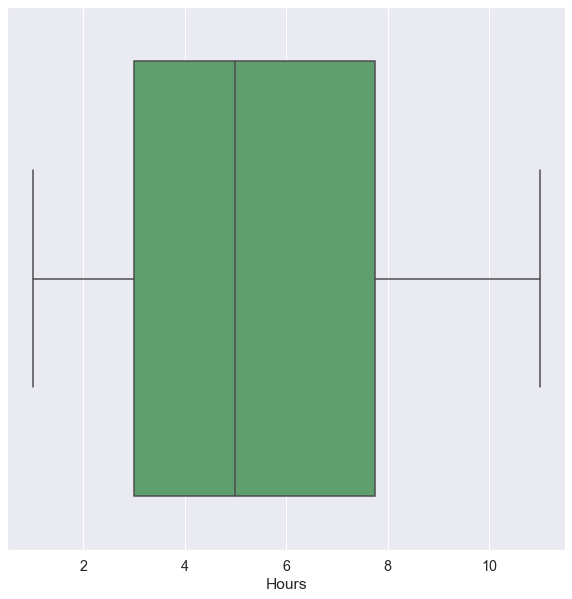

In [6]:
sns.boxplot(x="Hours", data=df,color='g')

<AxesSubplot:xlabel='Marks'>

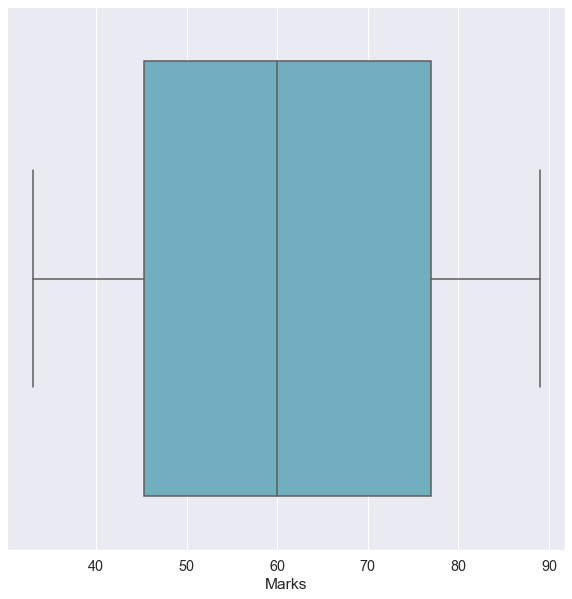

In [7]:
sns.boxplot(x="Marks", data=df,color='c')

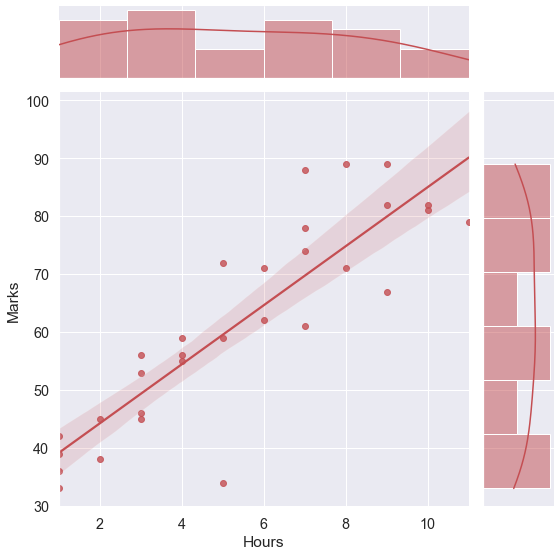

In [8]:
sns.jointplot(x='Hours', y='Marks', data=df, kind='reg',height=8, color='r')

In [9]:
df['Hours'].value_counts()

7     4
3     4
1     4
9     3
5     3
4     3
10    2
8     2
6     2
2     2
11    1
Name: Hours, dtype: int64

In [10]:
x = df['Hours'].values.reshape(-1, 1)
y = df['Marks']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
x_train.shape

(21, 1)

In [13]:
x_test.shape

(9, 1)

In [14]:
y_train.shape

(21,)

In [15]:
y_test.shape

(9,)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(x_test)
y_pred

array([83.66658124, 58.76012301, 73.70399795, 63.74141466, 48.79753972,
       48.79753972, 83.66658124, 78.6852896 , 53.77883137])

In [18]:
y_test

27    81
15    59
23    89
17    71
8     53
9     46
28    82
24    82
12    55
Name: Marks, dtype: int64

In [19]:
model.score(x_train, y_train)

0.7119113374060114

In [20]:
model.score(x_test, y_test)

0.8298240650265163

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
np.sqrt(mean_squared_error(y_test, y_pred))

6.097047447174455

In [23]:
model.predict([[7.5]])

array([71.21335213])

In [24]:
model.predict([[15]])

array([108.57303947])

In [27]:
model.coef_

array([4.98129165])

In [28]:
model.intercept_

33.85366478728858

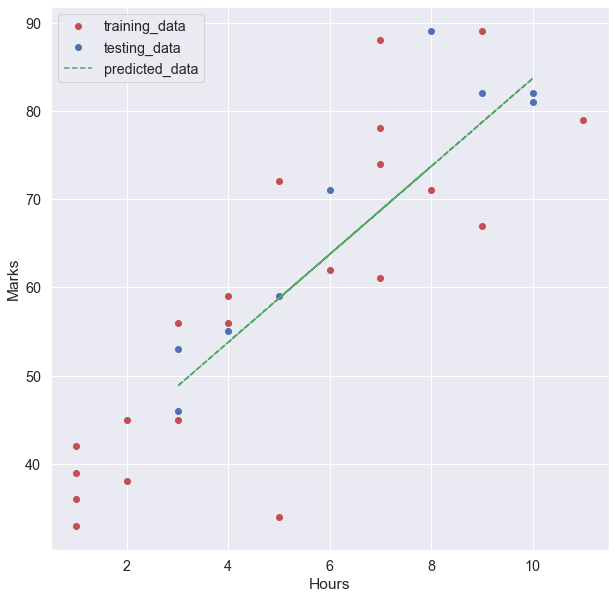

In [26]:
plt.plot(x_train, y_train, 'ro', label='training_data')
plt.plot(x_test, y_test, 'bo', label='testing_data')
plt.plot(x_test, y_pred, 'g--', label='predicted_data')
plt.xlabel('Hours')
plt.ylabel('Marks')
plt.legend()